In [1]:
pip install kaggle

In [2]:
#!/bin/bash
!kaggle datasets download preetviradiya/brian-tumor-dataset

Dataset URL: https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset
License(s): GPL-2.0
 99% 106M/107M [00:03<00:00, 43.5MB/s]
100% 107M/107M [00:03<00:00, 34.9MB/s]


In [3]:
!unzip /content/brian-tumor-dataset.zip

Archive:  /content/brian-tumor-dataset.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: B

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [5]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
CHANNELS = 3 #since the images are grayscale it should be 1

In [6]:
Tumor_path = '/content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor'
Healthy_path = "/content/Brain Tumor Data Set/Brain Tumor Data Set/Healthy"
categories = ['1', '0']

In [7]:
Tumor_data = os.listdir(Tumor_path)
Healthy_data = os.listdir(Healthy_path)

In [8]:
def load_data(image_data,path,label):
  data = []
  labels = []
  for image in image_data:
    image_path = os.path.join(path,image)
    image = cv2.imread(image_path)
    image = cv2.resize(image,(IMG_WIDTH,IMG_HEIGHT))
    data.append(image)
    labels.append(label)
  return data,labels

In [9]:
Tumors, Tumor_labels = load_data(Tumor_data,Tumor_path,1)
Healthy, Healthy_labels = load_data(Healthy_data,Healthy_path,0)


In [10]:
data = Tumors + Healthy
labels = Tumor_labels + Healthy_labels

Preparing and splitting the data

In [127]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

In [128]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [129]:
# normalizing the data
x_train = x_train/255.0
x_test = x_test/255.0

In [130]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [144]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape = (IMG_WIDTH,IMG_HEIGHT,CHANNELS)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation = 'softmax'))
# model.add(Dropout(0.5))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
history = model.fit(x_train,y_train, epochs = 10, validation_data = (x_test,y_test), batch_size = 32)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.5648 - loss: 0.6864 - val_accuracy: 0.7864 - val_loss: 0.4734
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7899 - loss: 0.4735 - val_accuracy: 0.8408 - val_loss: 0.3492
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8373 - loss: 0.3685 - val_accuracy: 0.8859 - val_loss: 0.2703
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8879 - loss: 0.2800 - val_accuracy: 0.9033 - val_loss: 0.2580
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9332 - loss: 0.1888 - val_accuracy: 0.9348 - val_loss: 0.1777
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9448 - loss: 0.1397 - val_accuracy: 0.9505 - val_loss: 0.1475
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9699 - loss: 0.0947 - val_accuracy: 0.9554 - val_loss: 0.1504
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9811 - loss: 0.0682 - val_accuracy: 0.9565 - 

In [146]:
loss, accuracy = model.evaluate(x_test,y_test)
print(loss)
print('Model_accuracy : {} %'.format(accuracy))

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9650 - loss: 0.1610
0.14154627919197083
Model_accuracy : 0.967391312122345 %


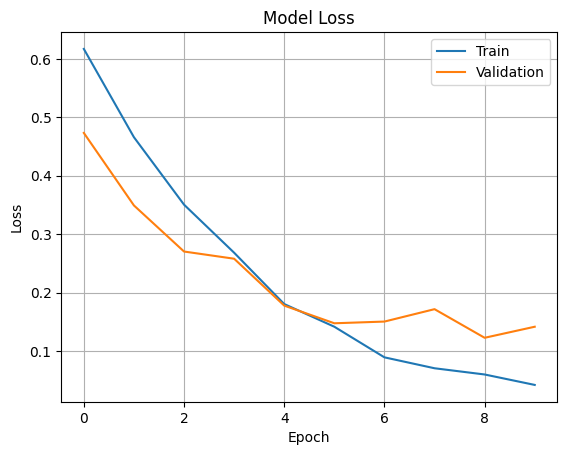

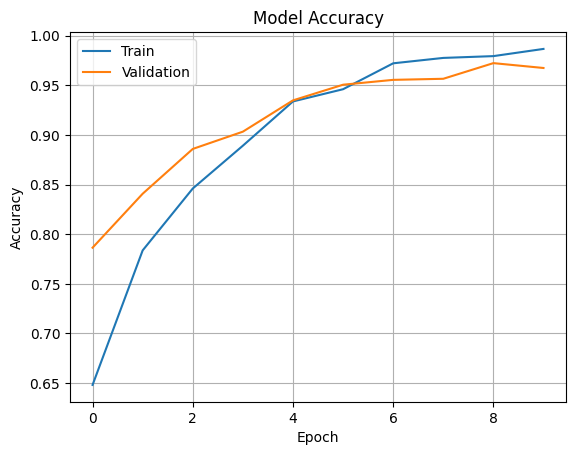

In [147]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

# Plot training & validation accuracy values (if applicable)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()


In [148]:
model.save("Tumor Detector.h5")